In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
df=pd.read_csv(r'C:\Users\pritam\Desktop\Income.csv')
df.head()

,Date/Time,Trip ID,Type,Base Fare,Additional Pickups,Distance,Time,Min Fare Supplement,Cancellation,Tip,Surge,Wait Time,Long Pickup Fee,Optional Insurance,Toll,Consecutive Trips Promotion,Quest Promotion,Total
0,"Wednesday, November 20, 2019 5:30 PM",4972f060-1d7e-4d14-9d4a-163b2ff30c06,UberX,$1.76,NaN,$0.46,$1.43,$0.34,NaN,NaN,$4.00,NaN,NaN,($0.02),NaN,NaN,NaN,$7.97
1,"Tuesday, November 19, 2019 7:07 PM",a5be1112-4114-48b7-bf81-109f389526fd,UberX,$1.76,NaN,$10.87,$6.70,NaN,NaN,NaN,$6.92,NaN,NaN,($0.56),NaN,NaN,NaN,$25.69
2,"Saturday, November 23, 2019 1:40 PM",01388754-4f19-47a3-9995-b023884508ad,POOL,NaN,$1.00,$6.48,$4.62,NaN,NaN,NaN,NaN,NaN,NaN,($0.38),NaN,NaN,NaN,$11.72
3,"Monday, November 18, 2019 2:06 PM",11767ed9-a329-4810-b506-6c2694b1a99f,UberX,$1.32,NaN,$6.81,$5.23,NaN,NaN,NaN,$1.00,NaN,NaN,($0.40),NaN,NaN,NaN,$13.96
4,"Tuesday, November 19, 2019 3:11 PM",77522fa3-e454-40f4-bd48-31ffe8e04caf,POOL,$1.76,NaN,$0.75,$1.75,$0.09,NaN,NaN,NaN,NaN,NaN,($0.04),NaN,NaN,NaN,$4.31


In [2]:
# removing the $ sign for further computation
df['Base Fare']=df['Base Fare'].str.replace('$','')

In [3]:
#removing dollar sign
df['Additional Pickups']=df['Additional Pickups'].str.replace('$','')

In [4]:
# removing dollar sign
df['Distance']=df['Distance'].str.replace('$','')

In [5]:
# removing dollar sign
df['Time']=df['Time'].str.replace('$','')

In [6]:
# removing dollar sign
df['Min Fare Supplement']=df['Min Fare Supplement'].str.replace('$','')

In [7]:
# replacing dollar sign with empty string
df['Tip']=df['Tip'].str.replace("$",'')

In [8]:
# replacing dollar sign with empty string
df['Surge']=df['Surge'].str.replace('$','')

In [9]:
# replacing dollar sign with empty sting
df['Wait Time']=df['Wait Time'].str.replace('$','')

In [10]:
# replacing $ sign
df['Long Pickup Fee']=df['Long Pickup Fee'].str.replace('$','')

In [11]:
# replacing non useful sign for further computation
df['Optional Insurance']=df['Optional Insurance'].str.replace('(','').str.replace('$','').str.replace(')','')


In [12]:
# replacing $ sign with empty string
df['Total']=df['Total'].str.replace("$",'')

In [13]:
df['Toll']=df['Toll'].str.replace('$','')

In [14]:
# checking null in the dataset
df.isnull()

,Date/Time,Trip ID,Type,Base Fare,Additional Pickups,Distance,Time,Min Fare Supplement,Cancellation,Tip,Surge,Wait Time,Long Pickup Fee,Optional Insurance,Toll,Consecutive Trips Promotion,Quest Promotion,Total
0,False,False,False,False,True,False,False,False,True,True,False,True,True,False,True,True,True,False
1,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,True,True,False
2,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,True,True,False
3,False,False,False,False,True,False,False,True,True,True,False,True,True,False,True,True,True,False
4,False,False,False,False,True,False,False,False,True,True,True,True,True,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,False,False,False,False,True,False,False,True,True,True,True,True,True,False,True,True,True,False
119,False,False,False,False,True,False,False,True,True,True,True,True,True,False,True,True,True,False
120,False,False,False,True,False,False,False,True,True,True,True,True,True,False,True,True,True,False
121,False,False,False,False,True,False,False,True,True,True,True,True,True,False,True,True,True,False


In [15]:
# filling o for null(NaN) value
df=df.fillna(0)

In [16]:
# Checking final dataset for the exploratory data analysis
df

,Date/Time,Trip ID,Type,Base Fare,Additional Pickups,Distance,Time,Min Fare Supplement,Cancellation,Tip,Surge,Wait Time,Long Pickup Fee,Optional Insurance,Toll,Consecutive Trips Promotion,Quest Promotion,Total
0,"Wednesday, November 20, 2019 5:30 PM",4972f060-1d7e-4d14-9d4a-163b2ff30c06,UberX,1.76,0,0.46,1.43,0.34,0,0,4.00,0,0,0.02,0,0.0,0.0,7.97
1,"Tuesday, November 19, 2019 7:07 PM",a5be1112-4114-48b7-bf81-109f389526fd,UberX,1.76,0,10.87,6.70,0,0,0,6.92,0,0,0.56,0,0.0,0.0,25.69
2,"Saturday, November 23, 2019 1:40 PM",01388754-4f19-47a3-9995-b023884508ad,POOL,0,1.00,6.48,4.62,0,0,0,0,0,0,0.38,0,0.0,0.0,11.72
3,"Monday, November 18, 2019 2:06 PM",11767ed9-a329-4810-b506-6c2694b1a99f,UberX,1.32,0,6.81,5.23,0,0,0,1.00,0,0,0.40,0,0.0,0.0,13.96
4,"Tuesday, November 19, 2019 3:11 PM",77522fa3-e454-40f4-bd48-31ffe8e04caf,POOL,1.76,0,0.75,1.75,0.09,0,0,0,0,0,0.04,0,0.0,0.0,4.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,"Sunday, November 24, 2019 9:07 AM",2a7a35b7-14a2-4729-83db-1f1ac303bdbf,UberX,1.32,0,2.09,1.69,0,0,0,0,0,0,0.12,0,0.0,0.0,4.98
119,"Wednesday, November 20, 2019 4:31 PM",f5c980d7-03df-4a13-992d-260d99134467,UberX,1.76,0,0.81,2.24,0,0,0,0,0,0,0.04,0,0.0,0.0,4.77
120,"Saturday, November 23, 2019 12:56 PM",19d18841-8858-45b3-ad59-c16fa56fe689,POOL,0,1.00,3.51,2.72,0,0,0,0,0,0,0.21,0,0.0,0.0,7.02
121,"Friday, November 22, 2019 4:10 PM",27225315-ea62-443a-9869-bdf1fed070b3,UberX,1.76,0,1.22,2.55,0,0,0,0,0,0,0.06,0,0.0,0.0,5.47


In [17]:
# convertin to float for calculation
df['Base Fare']=df['Base Fare'].astype(float)

In [18]:
df['Base Fare'].mean()

1.545447154471543

In [19]:
df['Base Fare'].sum()


190.09000000000003

In [20]:
df['Base Fare'].median()

1.76

In [21]:
#calculating total toll
df['Toll'].astype(float).sum()

41.0

In [22]:
df['Optional Insurance']=df['Optional Insurance'].astype(float)

In [23]:
# Calculating optional insurance
df['Optional Insurance'].sum()

19.91

In [24]:
# calculating total surge income
df['Surge']=df['Surge'].astype(float)

In [25]:
df['Surge'].sum()

140.26999999999998

In [26]:
# calculating sum of fare
df['Total'].astype(float).sum()

1303.0600000000002

In [27]:
# calculating total time interval between pickup and dropoff per minute
df['Time'].astype(float).sum()/0.25


2012.3200000000002

In [28]:
# clculating hour
2012.3200000000002/60

33.53866666666667

In [29]:
# total income by milage
df['Distance'].astype(float).sum()

366.99000000000007

In [30]:
#otherincome
1303.0600000000002-366.99000000000007-503.08000000000004

432.9900000000001

In [31]:
# calculating total milage
# per milage rate is 0.70 cent

366.99000000000007/0.70


524.2714285714287

In [32]:
# hence 524.27 miles have driven within one week.

In [33]:
# income by time
df['Time'].astype(float).sum()

503.08000000000004

In [34]:
# claculating total income per hour
# income by time+income by milage+others
503.08000000000004+366.99000000000007+432.9900000000001

1303.0600000000004

In [35]:
# claculating per hour income 
# this is only the time duration between pickup and dropoff.
incomeByHour=1303.0600000000004/33.53866666666667
incomeByHour

38.85246879223981

In [36]:
# Average online time per day
#total online 47.10 and worked days 5
onlinePerDay=47.10/5
onlinePerDay

9.42

In [37]:
# total income per hour on the basis of online
perhourincomebyonlinetime=1303.0600000000004/47.10
perhourincomebyonlinetime

27.66581740976646

In [38]:
# Total expenses of the uber 
# milage deduction 
TotalDrivenMilage=524.00
deduction= TotalDrivenMilage/0.58
deduction

903.4482758620691

In [39]:
# total toll
df['Toll'].astype(float).sum()

41.0

In [40]:
#Total income after deduction
NetIncome=1303.0600000000004-903.4482758620691
NetIncome

399.61172413793133

In [41]:
# net income per hour(only pickup and dropoff duration)
NetIncomePerHour=399.61172413793133/33.53866666666667
NetIncomePerHour

11.914955597656375

In [42]:
#netincome on the basis of  total online hours
NetIncomOnTheBasisOfOnlineHour=399.61172413793133/47.10
NetIncomOnTheBasisOfOnlineHour


8.48432535324695

No handles with labels found to put in legend.


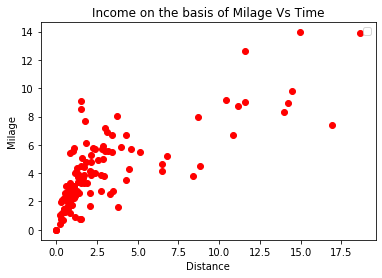

In [44]:
# creating scatterplot Time Vs Milage
plt.scatter(df['Distance'].astype(float),df['Time'].astype(float),color="red")
plt.title("Income on the basis of Milage Vs Time")
plt.xlabel("Distance")
plt.ylabel('Milage')
plt.legend()
plt.show()

(4.090081300813008, 3.63, 0    0.0
 dtype: float64)

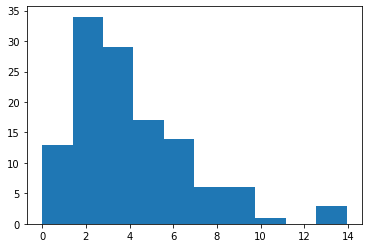

In [45]:
#plotting the histogram of the time
time=df['Time'].astype(float)
plt.hist(time)
# calculating mean, median and mode
tmean=time.mean()
tmedian=time.median()
tmode=time.mode()
tmean,tmedian,tmode

In [46]:
# In the above histogram 0 and 34 look outlier because their values are out of the normal flow
# of the data and it might happened due to the high traffice for long time(34) and (0)low value for rider cancellation.

(2.9836585365853647, 1.53, 0    0.00
 1    0.81
 2    1.07
 3    1.53
 dtype: float64)

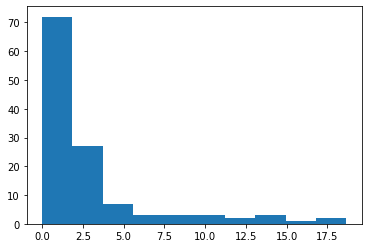

In [47]:
# plotting the histogram of the distance
distance=df['Distance'].astype(float)
plt.hist(distance)
# calculating mean, median, mode of distance
dmean=distance.mean()
dmedian=distance.median()
dmode=distance.mode()
dmean,dmedian,dmode

In [48]:
# here 72 looks outlier it could be the long trip that does happen often.

(1.545447154471543, 1.76, 0    1.76
 dtype: float64)

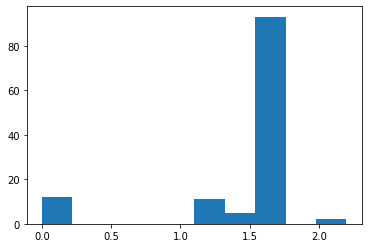

In [49]:
# plotting the histogram of the base fare
basefare=df['Base Fare'].astype(float)
plt.hist(basefare)
# calculating mean. median and mode of the base fare
bmean=basefare.mean()
bmedian=basefare.median()
bmode=basefare.mode()
bmean,bmedian,bmode

In [50]:
# I think 93 is outlier because its value seems abnormal and it could be the human errors.

(0.16186991869918702, 0.08, 0    0.04
 dtype: float64)

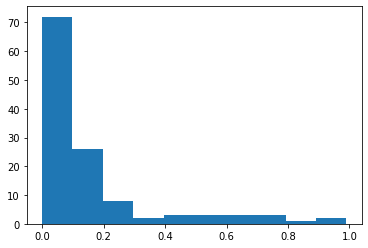

In [51]:
# plotting histogram of the optional insurance
optionalinsurence=df['Optional Insurance'].astype(float)
plt.hist(optionalinsurence)
# calculating mean, median and mode of the optional insurence
omean=optionalinsurence.mean()
omedian=optionalinsurence.median()
omode=optionalinsurence.mode()
omean,omedian,omode

In [52]:
# 72 and 26 look outlier and they might happen due to the long trip fare.

(1.1404065040650406, 0.0, 0    0.0
 dtype: float64)

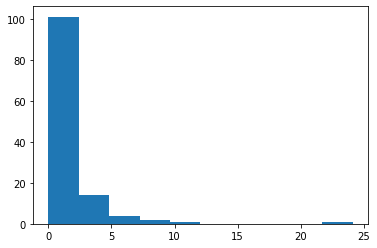

In [53]:
# plotting the histogram of surge price
surgePrice=df['Surge'].astype(float)
surgePrice
plt.hist(surgePrice)
# calculating mean, median and mode
smean=surgePrice.mean()
smedian=surgePrice.median()
smode=surgePrice.mode()
smean,smedian,smode

In [54]:
# where 101 is looks outlier and that does not happen often.I think that happen due to the high
# demand so price went very expensive.

In [55]:
# topalincome per trip with surge hour
surgePriceIncome=df[df.Surge>0.00]
surgePriceIncome
sIncome=surgePriceIncome['Total'].astype(float)
sIncome

0       7.97
1      25.69
3      13.96
6      12.07
7      11.24
10      8.49
31      6.66
34     13.48
35     11.57
36      7.76
37     13.81
38     43.67
43     11.91
44     11.40
51     20.82
56      9.11
57      7.67
58     15.90
62      9.80
65      9.72
66      6.84
67     20.73
68     15.85
71      8.76
72     34.00
75     13.53
82     52.48
89     15.07
90      9.53
100     5.24
106    11.49
122     7.42
Name: Total, dtype: float64

In [56]:
# calculating total income in normal hour
normalIncome=df[df.Surge==0]
normalIncome
nIncome=normalIncome['Total'].astype(float)
nIncome

2      11.72
4       4.31
5       5.52
8       4.39
9      38.36
       ...  
117    37.47
118     4.98
119     4.77
120     7.02
121     5.47
Name: Total, Length: 91, dtype: float64

In [57]:
# calculating PMF for surge condition
pmfSurge=sIncome/sIncome.sum()
pmfSurge

0      0.016827
1      0.054240
3      0.029474
6      0.025483
7      0.023731
10     0.017925
31     0.014061
34     0.028460
35     0.024428
36     0.016384
37     0.029157
38     0.092201
43     0.025146
44     0.024069
51     0.043957
56     0.019234
57     0.016194
58     0.033570
62     0.020691
65     0.020522
66     0.014441
67     0.043767
68     0.033464
71     0.018495
72     0.071784
75     0.028566
82     0.110801
89     0.031817
90     0.020121
100    0.011063
106    0.024259
122    0.015666
Name: Total, dtype: float64

In [58]:
# calculating pmf on normal condition
pmfNormal=nIncome/nIncome.sum()
pmfNormal

2      0.014130
4      0.005196
5      0.006655
8      0.005293
9      0.046249
         ...   
117    0.045176
118    0.006004
119    0.005751
120    0.008464
121    0.006595
Name: Total, Length: 91, dtype: float64

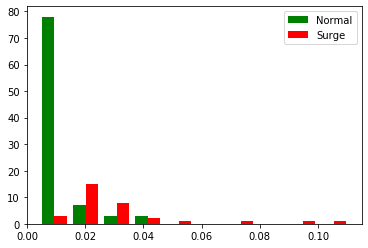

In [59]:
#plotting histogram of both condition
plt.hist([pmfNormal,pmfSurge],color=['green','red'],label=['Normal','Surge'])
plt.legend()

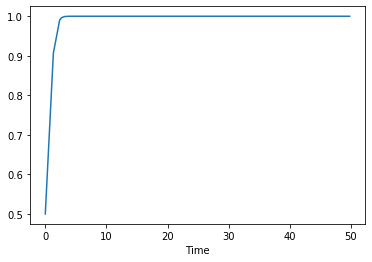

0       5.107143
1      23.928571
2      16.500000
3      18.678571
4       6.250000
         ...    
118     6.035714
119     8.000000
120     9.714286
121     9.107143
122     9.392857
Name: Time, Length: 123, dtype: float64

In [60]:
# calculating the CDF of the Time duration of the trips
t=df['Time'].astype(float)
# changing the monney in to actual time
# per minute rate is 0.28
actualTime=t/0.28

norm_cdf=norm.cdf(actualTime)
norm_cdf
# plotting cdf using seaborn
sns.lineplot(x=actualTime,y=norm_cdf)
plt.show()
actualTime

In [61]:
# hence most of the fares are more than 8 minutes or 95% fares are longer than 8 minutes.

No handles with labels found to put in legend.


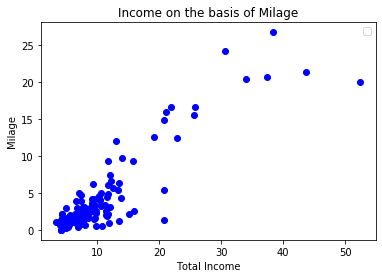

In [62]:
# According to the plot it proves that if we drive long distance we make more money.
# calculating total distance
milage=df['Distance'].astype(float)/0.70
milage
# plotting scatter plot milage vs income
plt.scatter(df['Total'].astype(float),milage,color="blue")
plt.title("Income on the basis of Milage")
plt.xlabel("Total Income")
plt.ylabel('Milage')
plt.legend()
plt.show()


In [63]:
# Hence if we go long trip we make more money.

No handles with labels found to put in legend.


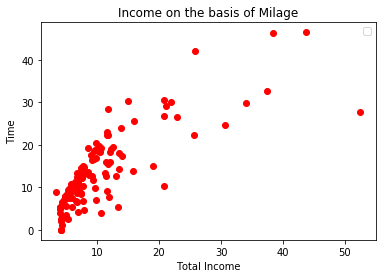

In [64]:
# scatter plot of time vs Income
time=df['Time'].astype(float)/0.30
plt.scatter(df['Total'].astype(float),time,color="Red")
plt.title("Income on the basis of Milage")
plt.xlabel("Total Income")
plt.ylabel('Time')
plt.legend()
plt.show()


In [65]:
# It shows time and income have linear relationship.It means more time more money.

In [66]:
# for further analysis we assume the distribution is normally distributed,linearly related and continuous numeric variable.
# creating new datafram with float value
df1=df.astype({'Time':'float64','Distance':'float64','Min Fare Supplement':'float64',
'Wait Time':'float64','Consecutive Trips Promotion':'float64','Quest Promotion':'float64'})
# calculate covariance
df1.cov()




,Base Fare,Distance,Time,Min Fare Supplement,Surge,Wait Time,Optional Insurance,Consecutive Trips Promotion,Quest Promotion
Base Fare,0.279732,0.023138,0.287754,0.006681,0.222339,0.016162,-0.001413,0.0,0.0
Distance,0.023138,14.480105,7.912923,-0.187785,2.713710,0.052243,0.786039,0.0,0.0
Time,0.287754,7.912923,7.340902,-0.251871,1.741658,0.116196,0.418700,0.0,0.0
Min Fare Supplement,0.006681,-0.187785,-0.251871,0.081119,-0.057684,0.005423,-0.010086,0.0,0.0
Surge,0.222339,2.713710,1.741658,-0.057684,8.483968,0.068399,0.131961,0.0,0.0
Wait Time,0.016162,0.052243,0.116196,0.005423,0.068399,0.094296,0.002067,0.0,0.0
Optional Insurance,-0.001413,0.786039,0.418700,-0.010086,0.131961,0.002067,0.042938,0.0,0.0
Consecutive Trips Promotion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
Quest Promotion,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [67]:
# calculating correlation between time and distance
time=df['Time'].astype(float)
dis=df['Distance'].astype(float)
corr, _ = pearsonr(time, dis)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.767


In [68]:
# claculating correlation between time and total
time=df['Time'].astype(float)
total=df['Total'].astype(float)
corr, _ = pearsonr(time, total)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.801


In [69]:
# calculating correlation between distance and total
dis=df['Distance'].astype(float)
total=df['Total'].astype(float)
corr, _ = pearsonr(dis, total)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.893


In [70]:
# claculating correlation between optional insurence and income
income=df['Total'].astype(float)
insurance=df['Optional Insurance'].astype(float)
corr, _ = pearsonr(income, insurance)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.877


In [71]:
# hence income, time, distance have positive relationor strong relationship among them.

In [72]:
# non linear relationship
surge=df['Surge'].astype(float)
dis=df['Distance'].astype(float)
corr, _ = pearsonr(surge, dis)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.245


In [73]:
# it looks they have non linear correlation.

In [74]:
# testing hypothesis 
#  Null Hypothesis: Income does not dependent on time duration it only depnds on milage.
# Alternative Hypothesis: Income also depends on time duration.
income=df['Total'].astype(float)
time=df['Time'].astype(float)

table=pd.crosstab(income,time)
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table.values)
p

0.040722649950546676

In [75]:
# From above testing it proves that the income also depends on the time duration too because observed p value is less
# than 0.05.

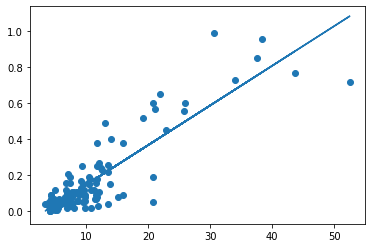

In [76]:
# i am predicting how much they have to pay optional insurance on the basis of the income.
from sklearn.linear_model import LinearRegression

x=pd.DataFrame(df['Total'].astype(float))
y=pd.DataFrame(df['Optional Insurance'].astype(float))
reg=LinearRegression()
reg.fit(x,y)
# predicting new values of y      
y_pred=reg.predict(x)
y_pred
# scatter plotting to see the data nature
plt.scatter(x,y)
# plotting line
plt.plot(x,y_pred)

In [77]:
# Hence they have liner relationship.It means if someone make more money they have to pay more 
#insurance as optional insurance.

In [ ]:
# Summary
# Statistical/Hypothetical Question
# What is the per hour income of the uber Driver?
# Per hour income of the uber driver is $8.48432535324695.

# Are they working more than 8 hours and getting paid overtime?
# Yes they are working more than 8 hours but they are not getting paid overtime.

#Outcome of your EDA
# What is the relationship of the variables? Are they correlated?
# Yes i have evaluated covarriance and pearson's correlation and found the relationship of the variables.

#What do you feel was missed during the analysis?
# I think i have missed some real data about the normal traffic hour.If i knew that i would find the actual traffic 
#condition of the city.

#Were there any variables you felt could have helped in the analysis?
# Yes i was expecting the total trips per day. If i had that data i would find the busy days and hours.

#Were there any assumptions made you felt were incorrect?
# No i have not seen any incorrect assumptions.

#What challenges did you face, what did you not fully understand?
# I have learned the thinkstat but i have used other method to analyze the data so it was kind of hard in the beginning but 
# cought up very fast.



In [ ]:
# Hence i have concluded that on the the basis of the real dataset, Uber Driver are working more than 10 hours per day
# so they supposed to get 2 hour overtime but instead of that they are making 8.48 cents per hour before tax and without
# any benifits.Thanks.